In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. Consider a grain of pollen suspended in water, whose horizontal position can be modeled by Brownian motion $\{ B(t)\}$ with parameter $\alpha = 4 \text{mm}^2/\text{s}$, as in Example 49.1. Calculate the mean function of $\{ B(t) \}$.

- By Brownian motion definition, 
    - $B(t) - B(0) \sim \text{Normal}(\mu=0, \sigma=\sqrt{4 \cdot (t_1 - t_0)} $
    - $E[B(t)] = E[B(t) - B(0)] = \mu_{B}(t) = 0$ 

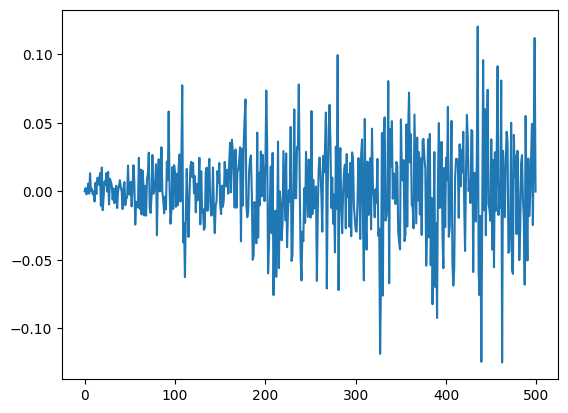

In [12]:
tvals=np.arange(0,500,1)
means = np.array([np.mean(np.random.normal(0, np.sqrt(4*t), size=500_000)) for t in tvals])
plt.plot(tvals, means)

### 2. Radioactive particles hit a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. Let $\{ N(t); t \ge 0 \}$ represent this Poisson process. Define the new process $\{ D(t); t \ge 3 \}$ by $$D(t) = N(t) - N(t-3)$$ This process represents the number of particles that hit the Geiger counter in the last 3 seconds. Calculate the mean function of $\{ D(t); t \ge 3 \}$

- For this poisson process, the arrivals for any time interval $t$ is distributed according to $\text{Poisson}(\lambda = 0.8)$ distribution
- Since non-overlapping time periods are independent in a Poisson process, the count of particles that hit the Geiger counter in the last 3 seconds $D(t) = N(t) - N(t-3)$ follows the same distribution across any 3 second period
    - $D(t) \sim \text{Poisson}(\lambda = 0.8 * 3 = 2.4)$

- $\mu_{D(t)}(t) = E[D(t)] = \lambda \cdot t = 0.8 * 3 = 2.4$

In [17]:
dist=np.random.poisson(lam=0.8*3, size=10_000)
np.mean(dist)

2.39696831

### 3. Consider the moving average process $\{ X[n]\}$ of example 48.2, defined by $$X[n] = 0.5 Z[n] + 0.5 Z[n-1]$$ where $\{ Z[n]\}$ is a sequence of i.i.d. standard normal random variables. Calculate the mean function of $\{ X[n] \}$

$$\begin{align}
    E[X[n]] &= E[0.5 Z[n] + 0.5 E[Z[n-1]]] \\
    &= 0.5 E[Z[n]] + 0.5 E[Z[n-1]] \\
    &= 0.5 \cdot 0 + 0.5 \cdot 0 & \text{by IID standard normal definition} \\
    &= 0
\end{align}$$

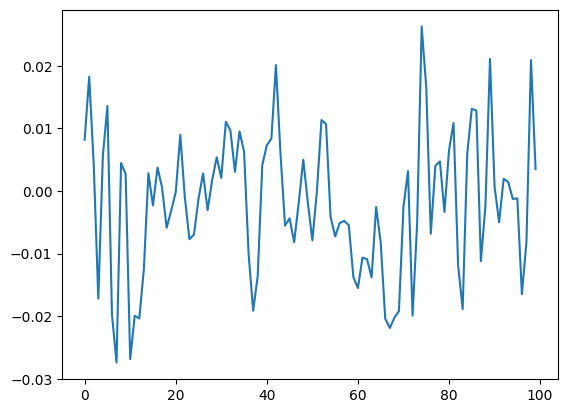

In [22]:
instantiations = np.array([np.convolve(np.repeat(0.5,2), np.random.normal(0,1,size=100), 'same') for _ in range(5000)])
plt.plot(np.arange(0,100,1), np.mean(instantiations, axis=0))

### 4. Let $\Theta$ be a $\text{Uniform}(a= -\pi, b = \pi)$ random variables, and let $f$ be a constant. Define the random phase process $\{ X(t) \}$ by $$ X(t) = \cos(2 \pi f t + \Theta) $$ Calculate the mean function of $\{ X(t) \}$. (Hint: Use LOTUS)

- This is an interesting problem
- Even though the mean function is 0 (i.e. at any given $t$, the value $X$ is symmetric around 0), once you plot out the function it will still carry a sinusoidal shape
    - This is a good intuition correction; 0 expectation does not always mean random!
- The sinusoidal shape occurs because there is a pattern to $Var[X]$ and $Cov[X]$

0.0025112080574796773

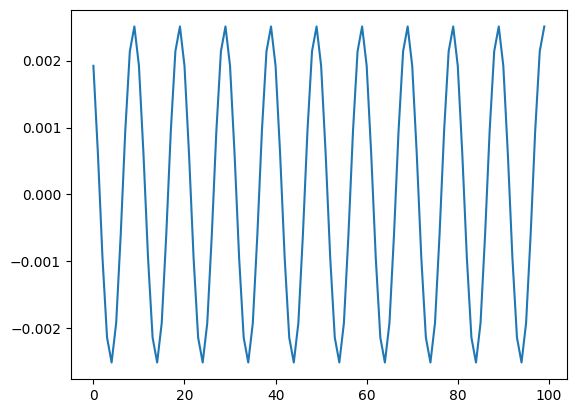

In [80]:
THETA = np.random.uniform(-np.pi, np.pi, size=10_000)
tvals = np.arange(-5,5,0.1)

instantiations = np.array([np.cos((2 * np.pi * tvals) + theta) for theta in THETA])
plt.plot(np.arange(0, len(tvals), 1), np.mean(instantiations, axis=0))

#### Method 1 (Using trigonometric identity)

- First, notice that since $f$ and $t$ are constants for a given $t$, the expectation for $X(t)$ can be simplified

$$\begin{align}
    E[X(t)] &= E[\cos (2\pi f t + \Theta)] \\
    &= E[\cos (2\pi f t) \cos(\Theta) - \sin(2\pi f t) \sin(\Theta)] & \text{Using } \cos(a+b) = \cos(a)\cos(b) - \sin(a)\sin(b) \\
    &= E[\cos (2\pi f t) \cos(\Theta)] - E[\sin(2\pi f t) \sin(\Theta)] \\
    &= \cos (2\pi f t) E[\cos(\Theta)] - \sin(2\pi f t) E[\sin(\Theta)] \\
\end{align}$$

- Now, the problem reduces to finding $E[\cos(\Theta)]$ and $E[\sin(\Theta)]$
    - As tempting as it might be, note that $E[\cos(\Theta)] \neq \cos(E[\Theta])$ and $E[\sin(\Theta)] \neq \sin(E[\Theta])$

- The PDF of the uniform distribution $\Theta$ here is 
    - $f(\Theta) = \frac{1}{b-a} = \frac{1}{2\pi}$

$$\begin{align}
    E[\cos(\Theta)] &= \int_{\Theta} \cos(\Theta) f(\Theta) d \Theta \\
    &= \int_{\Theta} \cos(\Theta) \frac{1}{2\pi} d \Theta \\
    &= \frac{1}{2\pi} \int_{\Theta} \cos(\Theta) d \Theta \\
    &= \frac{1}{2\pi} [sin(\Theta)]^{\pi}_{-\pi} \\
    &= \frac{1}{2\pi} \cdot 0 \\
    &= 0
\end{align}$$

$$\begin{align}
    E[\sin(\Theta)] &= \int_{\Theta} \sin(\Theta) f(\Theta) d \Theta \\
    &= \int_{\Theta} \sin(\Theta) \frac{1}{2\pi} d \Theta \\
    &= \frac{1}{2\pi} \int_{\Theta} \sin(\Theta) d \Theta \\
    &= \frac{1}{2\pi} [-\cos(\Theta)]^{\pi}_{-\pi} \\
    &= -\frac{1}{2\pi} [\cos(\Theta)]^{\pi}_{-\pi} \\
    &= -\frac{1}{2\pi} [1 - 1]^{\pi}_{-\pi} \\
    &= 0
\end{align}$$

- Hence

$$\begin{align}
    E[X(t)] &= \cos (2\pi f t) E[\cos(\Theta)] - \sin(2\pi f t) E[\sin(\Theta)] \\
    &= \cos (2\pi f t) \cdot 0 - \sin(2\pi f t) \cdot 0 \\
    &= 0
\end{align}$$


In [26]:
unif=np.random.uniform(low=-np.pi, high=np.pi, size=1)
tvals = np.arange(-10,10,0.05)
xvals = np.cos((2 * np.pi * tvals) + unif[0])
np.mean(xvals) ##close to 0

-1.3915535390651712e-14

#### Method 2 (Using LOTUS)

$$\begin{align}
    E[X(t)] &= E[\cos (2\pi f t + \Theta)] \\
    &= \int_{-\pi}^{\pi} \cos (2\pi f t + \Theta) \cdot \frac{1}{2 \pi} d \Theta \\
    &= \frac{1}{2 \pi} \int_{-\pi}^{\pi} \cos (2\pi f t + \Theta) d \Theta \\
    &= \frac{1}{2 \pi} [\sin (2\pi f t + \Theta)]^{\pi}_{-\pi} \\
    &= \frac{1}{2 \pi} [\sin (2\pi f t + \pi) - \sin (2\pi f t - \pi)] \\
    &= \frac{1}{2 \pi} [(\sin (2\pi f t) \cos(\pi) + \sin(\pi) \cos(2\pi f t))  - (\sin (2\pi f t) \cos(\pi) - \sin(\pi) \cos(2\pi f t))] \\
    &= \frac{1}{2 \pi} [\sin (2\pi f t) \cos(\pi) + \sin(\pi) \cos(2\pi f t)  - \sin (2\pi f t) \cos(\pi) + \sin(\pi) \cos(2\pi f t)] \\
    &= \frac{1}{2 \pi} [2 \sin(\pi) \cos(2\pi f t)] \\
    &= \frac{1}{\pi} [\sin(\pi) \cos(2\pi f t)] \\
    &= 0 & \sin(\pi) = 0
\end{align}$$
